
<div style="text-align: center; padding: 30px 10px;">

<h1 style="color:#ff7500; font-size: 24px; margin-bottom: 10px;">
МФТИ ФПМИ
</h1>

<h2 style="font-size: 30px; margin-top: 5px;">
Практикум Python - Продвинутый Поток
</h2>

<hr style="width: 60%; border: 1px solid #10069f; margin: 25px auto;">

<h3 style="font-size: 36px;">
2. ООП в Python - Magic Methods
</h3>

<p style="margin-top: 20px;">
<strong>Дата:</strong> 10-12 февраля 2026 года<br>
</p>

<p style="margin-top: 25px;">
Данный ноутбук является частью серии семинаров по курсу  
<em>«Практикум Python»</em> и предназначен для учебных и образовательных целей.
</p>

</div>

&gt; **Что такое ООП?**

&gt; Мы разбиваем код на классы, создаём объекты классов


&gt; **Зачем?**

&gt; 1. **Множественные экземпляры**

Классы, по сути, являются фабриками для генерации одного или нескольких объектов. Каждый раз, когда мы
вызываем класс, мы создаём новый объект с отдельным пространством имён. Каждый объект, созданный
из класса, имеет доступ к атрибутам класса и получает собственное пространство имён для данных, которое различается для каждого объекта.

2. **Кастомизация через наследование**

Классы также поддерживают концепцию ООП-наследования: мы можем расширить класс, переопределив
его атрибуты вне самого класса. В более общем смысле, классы могут создавать
иерархии пространств имён, которые определяют имена, используемые объектами, созданными из
классов в иерархии.

3. **Перегрузка операторов**

Классы могут определять объекты, которые реагируют на
операции, которые мы видели на практике над встроенными типами. Например, объекты, созданные
с помощью классов, можно сплайсить, конкатенировать, индексировать и так далее. Python предоставляет
хуки, которые классы могут использовать для перехвата и реализации любых операций над встроенными типами.


**ВЫВОД: ООП НУЖНО ДЛЯ ПЕРЕИСПОЛЬЗОВАНИЯ КОДА, ЧТОБЫ ИЗБЕЖАТЬ КОПИПАСТЫ**

## Тип → Класс → Объект

* **Тип**    - контракт на набор значений и операций над ними
* **Класс**  - конкретная реализация типа
* **Объект** - экземпляр (instance) класса

In [ ]:
# Инстанс
1

# Класс/тип
print((1).__class__, type(1))
print(int.__class__, type(int))

<class 'int'> <class 'int'>
<class 'type'> <class 'type'>


In [ ]:
# Мы можем аналогично
class MyClass:
    pass

example = MyClass()
print(example.__class__, type(example))
print(MyClass.__class__, type(MyClass))

<class '__main__.MyClass'> <class '__main__.MyClass'>
<class 'type'> <class 'type'>


Раз мы можем создавать свои классы, то мы должны уметь и добавлять им все те же методы и операции, которые работают для обычных типов.

## 0. Классы как объект

Всё в питоне есть объект, и классы - не исключение. Это делает работу с кодом более гибкой - классы можно передавать как аргумент функции, функцию можно передавать как аргумент функции. Давайте посмотрим на примеры, как это выглядит для классов.

In [ ]:
class Apple:
    apple_counter = 0 # атрибут класса

    def __init__(self, color):
        self.__class__.apple_counter += 1
        self.color = color

    def get_color(self):
        return self.color

red_apple = Apple("red")
green_apple = Apple("green")

In [ ]:
print(Apple.__dict__)
print(red_apple.__dict__)
print(green_apple.__dict__)

{'__module__': '__main__', 'apple_counter': 2, '__init__': <function Apple.__init__ at 0x00000272E7428EA0>, 'get_color': <function Apple.get_color at 0x00000272E7429D00>, '__dict__': <attribute '__dict__' of 'Apple' objects>, '__weakref__': <attribute '__weakref__' of 'Apple' objects>, '__doc__': None}
{'color': 'red'}
{'color': 'green'}


In [ ]:
dir()

['Apple',
 'In',
 'MyClass',
 'Out',
 '_',
 '_1',
 '_11',
 '_14',
 '_15',
 '_16',
 '_17',
 '_18',
 '_20',
 '_21',
 '_22',
 '_23',
 '_24',
 '_25',
 '_4',
 '_7',
 '_8',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'example',
 'exit',
 'get_ipython',
 'green_apple',
 'open',
 'quit',
 'red_apple']

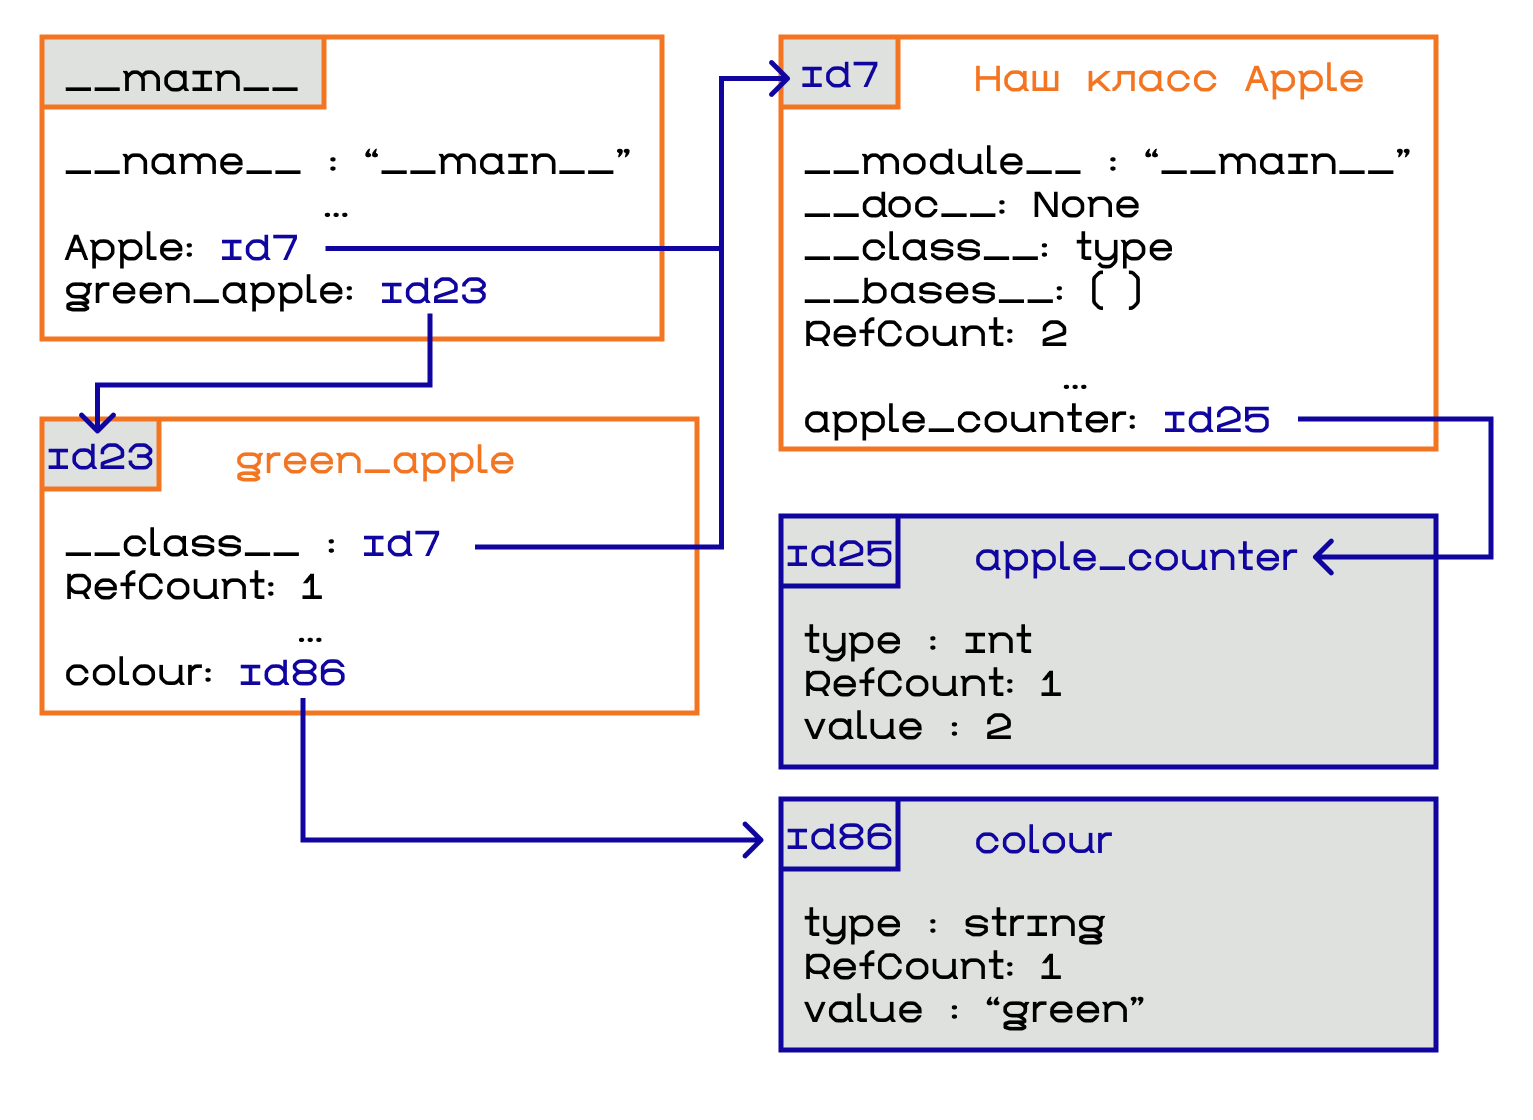

Алгоритм поиска функции `green_apple.get_colour()` :

1. Идём в `__class__` -> пришли в объект класса
2. Идём в `__dict__` -> ищем функцию. Если нашли - вызываем и на вход первым аргументом кладём green_apple.
3. Если не нашли в `__dict__`, идём в `__mro__` у Apple и начинаем итерироваться по классам-родителям там. Итерируемся пока не найдём нужную функцию в `__dict__` класса-родителя.

P.S. MRO - Method Resolution Order, в `__mro__` лежат классы-родители уже в нужном порядке, в отличие от `__bases__`; причём в `__bases__` только прямые классы-родители, а в `__mro__` все классы, где в теории можно искать - бабушки, дедушки, прабабушки.... :)

In [ ]:
print(Apple.apple_counter) # Тут мы обращаемся к атрибуту класса

2


In [ ]:
print(green_apple.color) # Тут мы обращаемся к атрибуту объекта

green


In [ ]:
print(green_apple.apple_counter) # Тут мы тоже обратились к атрибуту класса, т.к. такого атрибута объекта у нас нет

2


In [ ]:
green_apple.apple_counter = "No counter" # тут нам не даёт изменить атрибут класса, поэтому создался атрибут объекта с таким же названием
print(Apple.apple_counter) # атрибут класса
print(red_apple.apple_counter) # всё ещё атрибут класса
print(green_apple.apple_counter) # атрибут объекта

2
2
No counter


## Особенные методы класса

Сейчас мы умеем делать примерно следующее:


In [ ]:
class A:
    X = 10                       # Переменная класса

    def __init__(self, x: int):  # Инициализация состояния инстанса self
        self._x = x              # Переменная инстанса self

    def foo(self) -> None:       # Метод класса
        self._x += 1             # Обновление переменной инстанса self

### Classmethod, staticmethod

Но иногда нам хотелось бы делать статические методы, как в С++. Оказывается, и это мы можем сделать :)

In [6]:
class A:
    @classmethod
    def foo_class(cls): # заметим: тут отмечается, что первым на вход придёт класс
        # а не экземпляр. При этом это лишь привычный нейминг,
        # в целом без разницы как называть первый аргумент функции, просто
        # мы знаем, что туда поступит сам класс как объект
        print("This is a class method!")

    @staticmethod
    def foo_static():
        print("This is a static method!")

In [9]:
# обычно обращаемся через сам класс
A.foo_class()
A.foo_static()

# можно обращаться и из объектов данного класса
a = A()
a.foo_class()
a.foo_static()

This is a class method!
This is a static method!
This is a class method!
This is a static method!


Зачем это может быть нужно?

Ну, например, для того, чтобы сделать у класса **несколько init'ов** :)

Давай посмотрим на упрощенный код библиотеки `Datetime`:

In [11]:
class Datetime:
    def __init__(self, y, m, d):
        self.y = y
        self.m = m
        self.d = d

    @classmethod
    def today(cls):
        y, m, d = list(map(int, tdy.split()))
        return cls(y, m, d)

tdy = "2025 09 20"


if __name__ == "__main__":
    # old
    y, m, d = list(map(int, tdy.split()))
    now = Datetime(y, m, d)
    # new
    now = Datetime.today()
    print(f"{now.d}-{now.m}-{now.y}")

20-9-2025


### Property

In [12]:
class Student:
    def __init__(self, last, initials):
        self.last = last
        self.initials = initials
        self.email = f"{last.lower()}.{initials.lower()}@phystech.edu"
        # странно, что мы считаем его только один раз - вдруг он поменяет фамилию

    def full_name(self):
        return f"{self.last} {self.initials[0]}. {self.initials[1]}."
        # Теперь он всегда актуальный, но немного странно, что это метод, а не атрибут

st = Student("Ivanov", "PA")
print(st.email)
print(st.full_name())

ivanov.pa@phystech.edu
Ivanov P. A.


А теперь этот же код с property:

In [13]:
class Student:
    def __init__(self, last, initials):
        self.last = last
        self.initials = initials

    @property
    def email(self):
        return f"{self.last.lower()}.{self.initials.lower()}@phystech.edu"

    @property
    def full_name(self):
        return f"{self.last} {self.initials[0]}. {self.initials[1]}."
        # Теперь он всегда актуальный, но немного странно, что это метод, а не атрибут

st = Student("Ivanov", "PA")
print(st.email)
print(st.full_name)

ivanov.pa@phystech.edu
Ivanov P. A.


In [14]:
# А могу ли я присовить такой атрибут?
st.full_name = "Alekseev A. A."

AttributeError: property 'full_name' of 'Student' object has no setter

In [17]:
class Student:
    def __init__(self, last, initials):
        self.last = last
        self.initials = initials

    @property
    def email(self):
        return f"{self.last.lower()}.{self.initials.lower()}@phystech.edu"

    @property
    def full_name(self):
        return f"{self.last} {self.initials[0]}. {self.initials[1]}."
        # Теперь он всегда актуальный, но немного странно, что это метод, а не атрибут

    @full_name.setter
    def full_name(self, s):
        parts = s.split()
        self.last = parts[0]
        self.initials = f"{parts[1][0]}{parts[2][0]}"

st = Student("Ivanov", "PA")
print(st.email)
print(st.full_name)

st.full_name = "Alekseev A. A."
print(st.email)

ivanov.pa@phystech.edu
Ivanov P. A.
alekseev.aa@phystech.edu


**Зачем всё это?**

Мысль 1. Часто в разработке сначала пользуются атрибутами, а потом оказывается, что их нужно генерировать. Если не пользоваться `property`, то придётся переписывать весь старый код на методы вместо атрибутов

Мысль 2. Декоратор `property` как бы подсказывает, что дальше функция настолько проста и несложна в вычислении, что её практически можно считать атрибутом класса.

## Создание объектов класса

Таким образом, можно заметить, что в Python почти у всего важного для внутренней работы есть нижние подчеркивания слева и справа. Для классов есть довольно много методов, которые можно таким образом определять - это `Dunder` или `Magic` методы.

Для начала поговорим о создании класса.

In [ ]:
class LoudApple:
    def __new__(cls, *args, **kwargs):
        # здесь args, kwargs - параметры, которые мы потом положим в init
        # но сначала надо создать instance класса
        # поэтому не self, а cls - там лежит наш класс
        print("new: ", cls, args, kwargs)
        return super().__new__(cls) # тут создаётся наш объект - пока что без инициализованных параметров. В нюансы вдаваться не будем :)

    def __init__(self, *args, **kwargs):
        # тут мы инициализурем поля у созданного объекта
        print("init: ", args, kwargs)

a = LoudApple(1, "my", color="red")

new:  <class '__main__.LoudApple'> (1, 'my') {'color': 'red'}
init:  (1, 'my') {'color': 'red'}


Таким образом, грубо говоря, создание нового объекта для данного класса `x = A(1, "my", color="red")` идейно эквивалентно следующему блоку кода:

```
x = A.__new__(A, 1, "my", color="red")  # создаём объект класса, первый аргумент - сам класс
if isinstance(x, A):
    type(x).__init__(x, 1, "my", color="red") # инициализируем поля, первый аргумент - объект класса
```

Отсюда логически следует, что `__init__` должен возвращать `None` (обратное вызывает ошибку), а вот `__new__` обязательно должен что-то возвращать :)

In [ ]:
class WeirdInitApple:
    def __init__(self, color):
        self.color = color
        return color

a = WeirdInitApple("red")

TypeError: __init__() should return None, not 'str'

Зачем может быть нужен `__new__`? [Когда-то](https://python-history.blogspot.com/2010/06/inside-story-on-new-style-classes.html) же жили без него :)]

### 1. Создание своих Immutable types

In [ ]:
# хотим: tuple, который в своих ячейках хранит строки и при создании делает их всех заглавными буквами

# до

class NoNewUppercaseTuple(tuple):
    def __init__(self, lst):
        print(f"init {lst}")
        for i, arg in enumerate(lst):
            if isinstance(arg, str):
                self[i] = arg.upper()
            else:
                raise ValueError(f"Expected a string, got: {type(arg)}")

a = NoNewUppercaseTuple(["a", "b", "c"]) # когда init вызван, объект уже создан и его нельзя менять

init ['a', 'b', 'c']


TypeError: 'NoNewUppercaseTuple' object does not support item assignment

In [ ]:
class UppercaseTuple(tuple):
    def __new__(cls, lst):
        print(f"new {lst}")
        for arg in lst:
            if not isinstance(arg, str):
                raise ValueError(f"Expected str, got: {type(arg)}")
        return super().__new__(cls, (s.upper() for s in lst))

a = UppercaseTuple(["a", "b", "c"])
print(a)
b = UppercaseTuple(["a", "1", 24])

new ['a', 'b', 'c']
('A', 'B', 'C')
new ['a', '1', 24]


ValueError: Expected str, got: <class 'int'>

### 2. Проверка аргументов до создания класса - см. выше пример

### 3. Модификация логики создания объектов

Пусть мы хотим, чтобы логика была следующей:

&gt; если такой объект НЕ существует, то надо его создать
&gt; если такой объект существует, то используем уже созданный


По сути это Singleton - класс, у которого не может быть более 1 объекта в рамках программы.

In [ ]:
class Singleton:
    _instance = None # атрибут класса

    def __new__(cls, *args, **kwargs):
        if cls._instance is None:
            print(f"Creating Singleton instance {args} {kwargs}")
            cls._instance = super().__new__(cls)
        return cls._instance


s1 = Singleton()
s2 = Singleton()

print(s1 is s2)
print(id(s1))
print(id(s2))

Creating Singleton instance () {}
True
2692524756000
2692524756000


Но что тогда произойдёт с init? Будет ли он вызван дважды?

In [ ]:
class Singleton:
    _instance = None # атрибут класса

    def __new__(cls, *args, **kwargs):
        if cls._instance is None:
            print(f"Creating Singleton instance {args} {kwargs}")
            cls._instance = super().__new__(cls)
        return cls._instance

    def __init__(self, name):
        self.name = name


s1 = Singleton("Not Nick")
s2 = Singleton("Nick")

print(s1 is s2)
print(id(s1))
print(id(s2))
print(s1.name)
print(s2.name)

Creating Singleton instance ('Not Nick',) {}
True
2692524755760
2692524755760
Nick
Nick


## Копирование объекта класса

Из прошлых пар мы помним, что есть определённые сложности с копированием элементов в Python, особенно если эти элементы мутабельные.

In [18]:
lst1 = [1, 2, 3, 4]
lst2 = lst1
lst2[2] = 10000
lst1 #окак

[1, 2, 10000, 4]

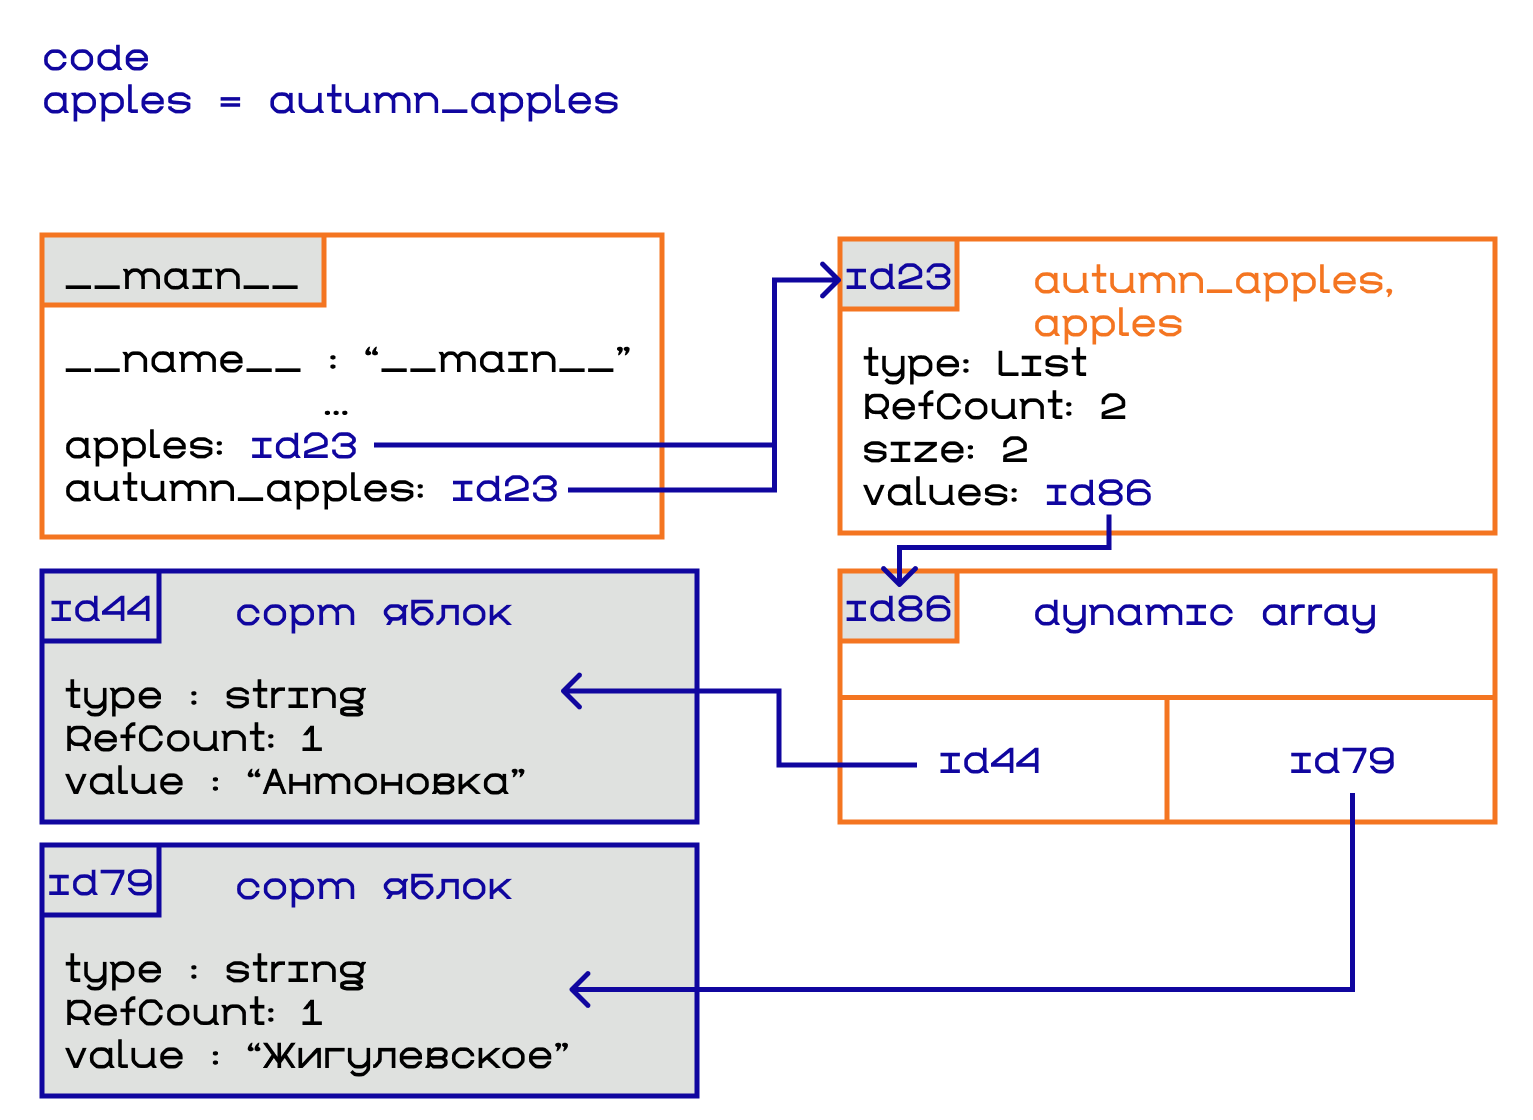

Есть решение! Shallow copy

In [20]:
lst1 = [1, 2, 3, 4]
lst2 = lst1.copy()
lst2[2] = 100
lst1, lst2

([1, 2, 3, 4], [1, 2, 100, 4])

Но!

In [24]:
lst1 = ["Антоновка", "Жигулевское"]
lst2 = lst1.copy()
lst2[0] is lst1[0]

True

Таким образом, это будет выглядеть примерно так:

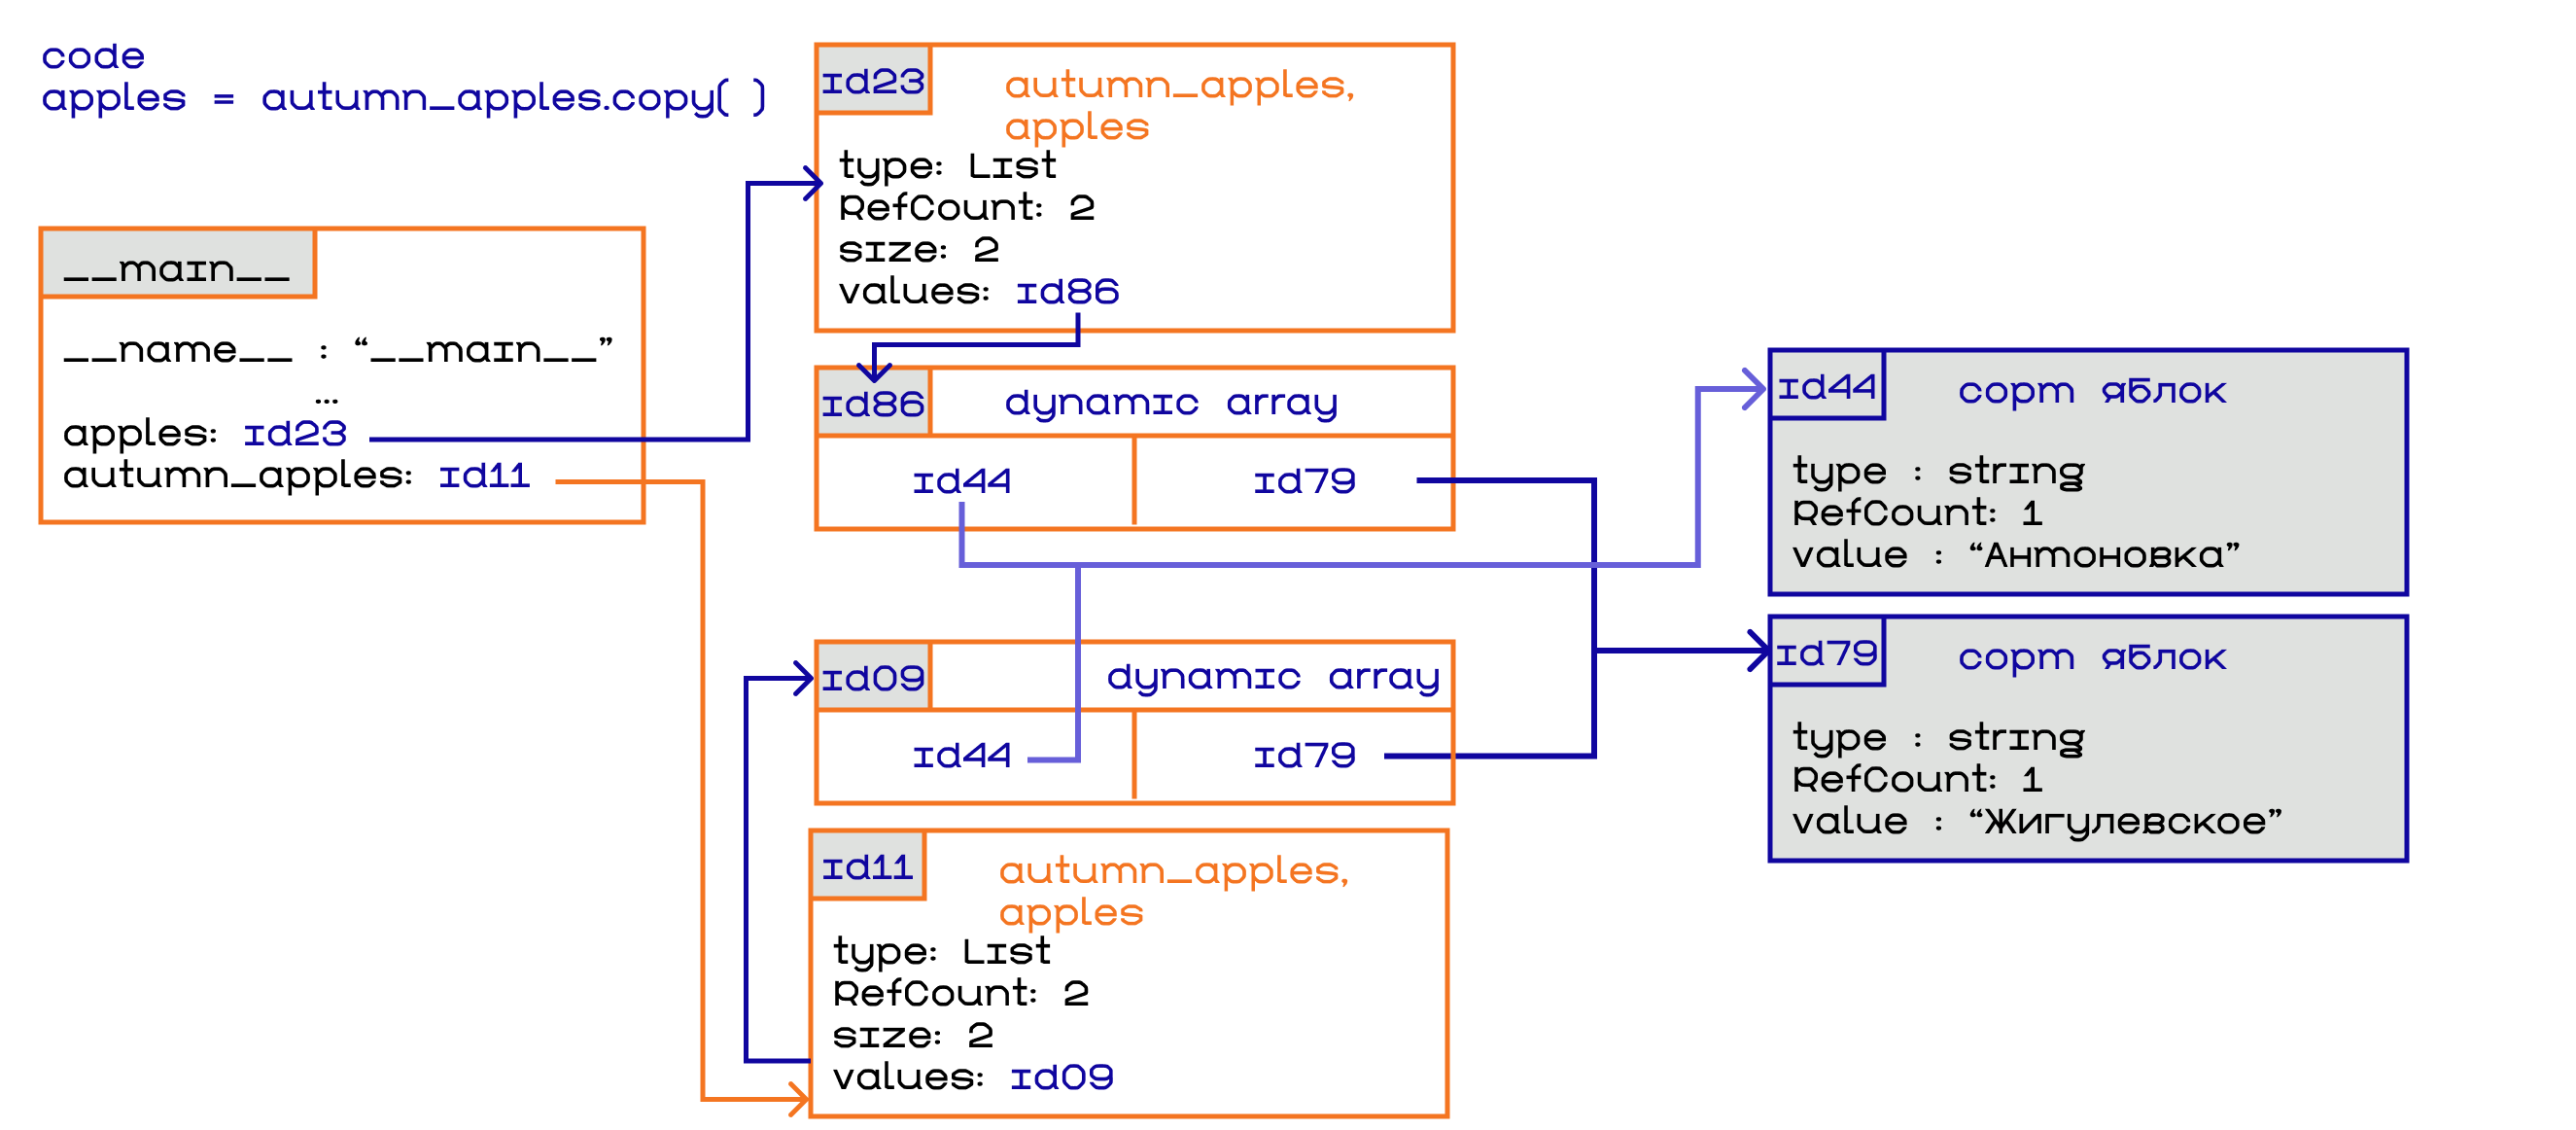

И если у нас будут mutable объекты вместо immutable...

In [2]:
lst1 = [1, 2, [1, 2, 3]]
lst2 = lst1.copy()

lst2[2].append(5)
lst1, lst2

([1, 2, [1, 2, 3, 5]], [1, 2, [1, 2, 3, 5]])

In [3]:
# но при этом
lst1 = [1, 2, [1, 2, 3]]
lst2 = lst1.copy()

lst2.append(5)
lst1, lst2 # сами массивы для lst1 и lst2 теперь различны, поэтому изменение одного не влечёт изменения другого

([1, 2, [1, 2, 3]], [1, 2, [1, 2, 3], 5])

Чтобы полностью разнести такие объекты, нужно сделать `deep copy`

In [4]:
from copy import deepcopy

lst1 = [1, 2, [1, 2]]
lst2 = deepcopy(lst1)

lst2[2].append(5)
lst1, lst2

([1, 2, [1, 2]], [1, 2, [1, 2, 5]])

И даже если объекты не были мутабельными...

In [5]:
lst1 = ["Антоновка", "Жигулевское"]
lst2 = deepcopy(lst2)

lst1[0] is lst2[0]

False

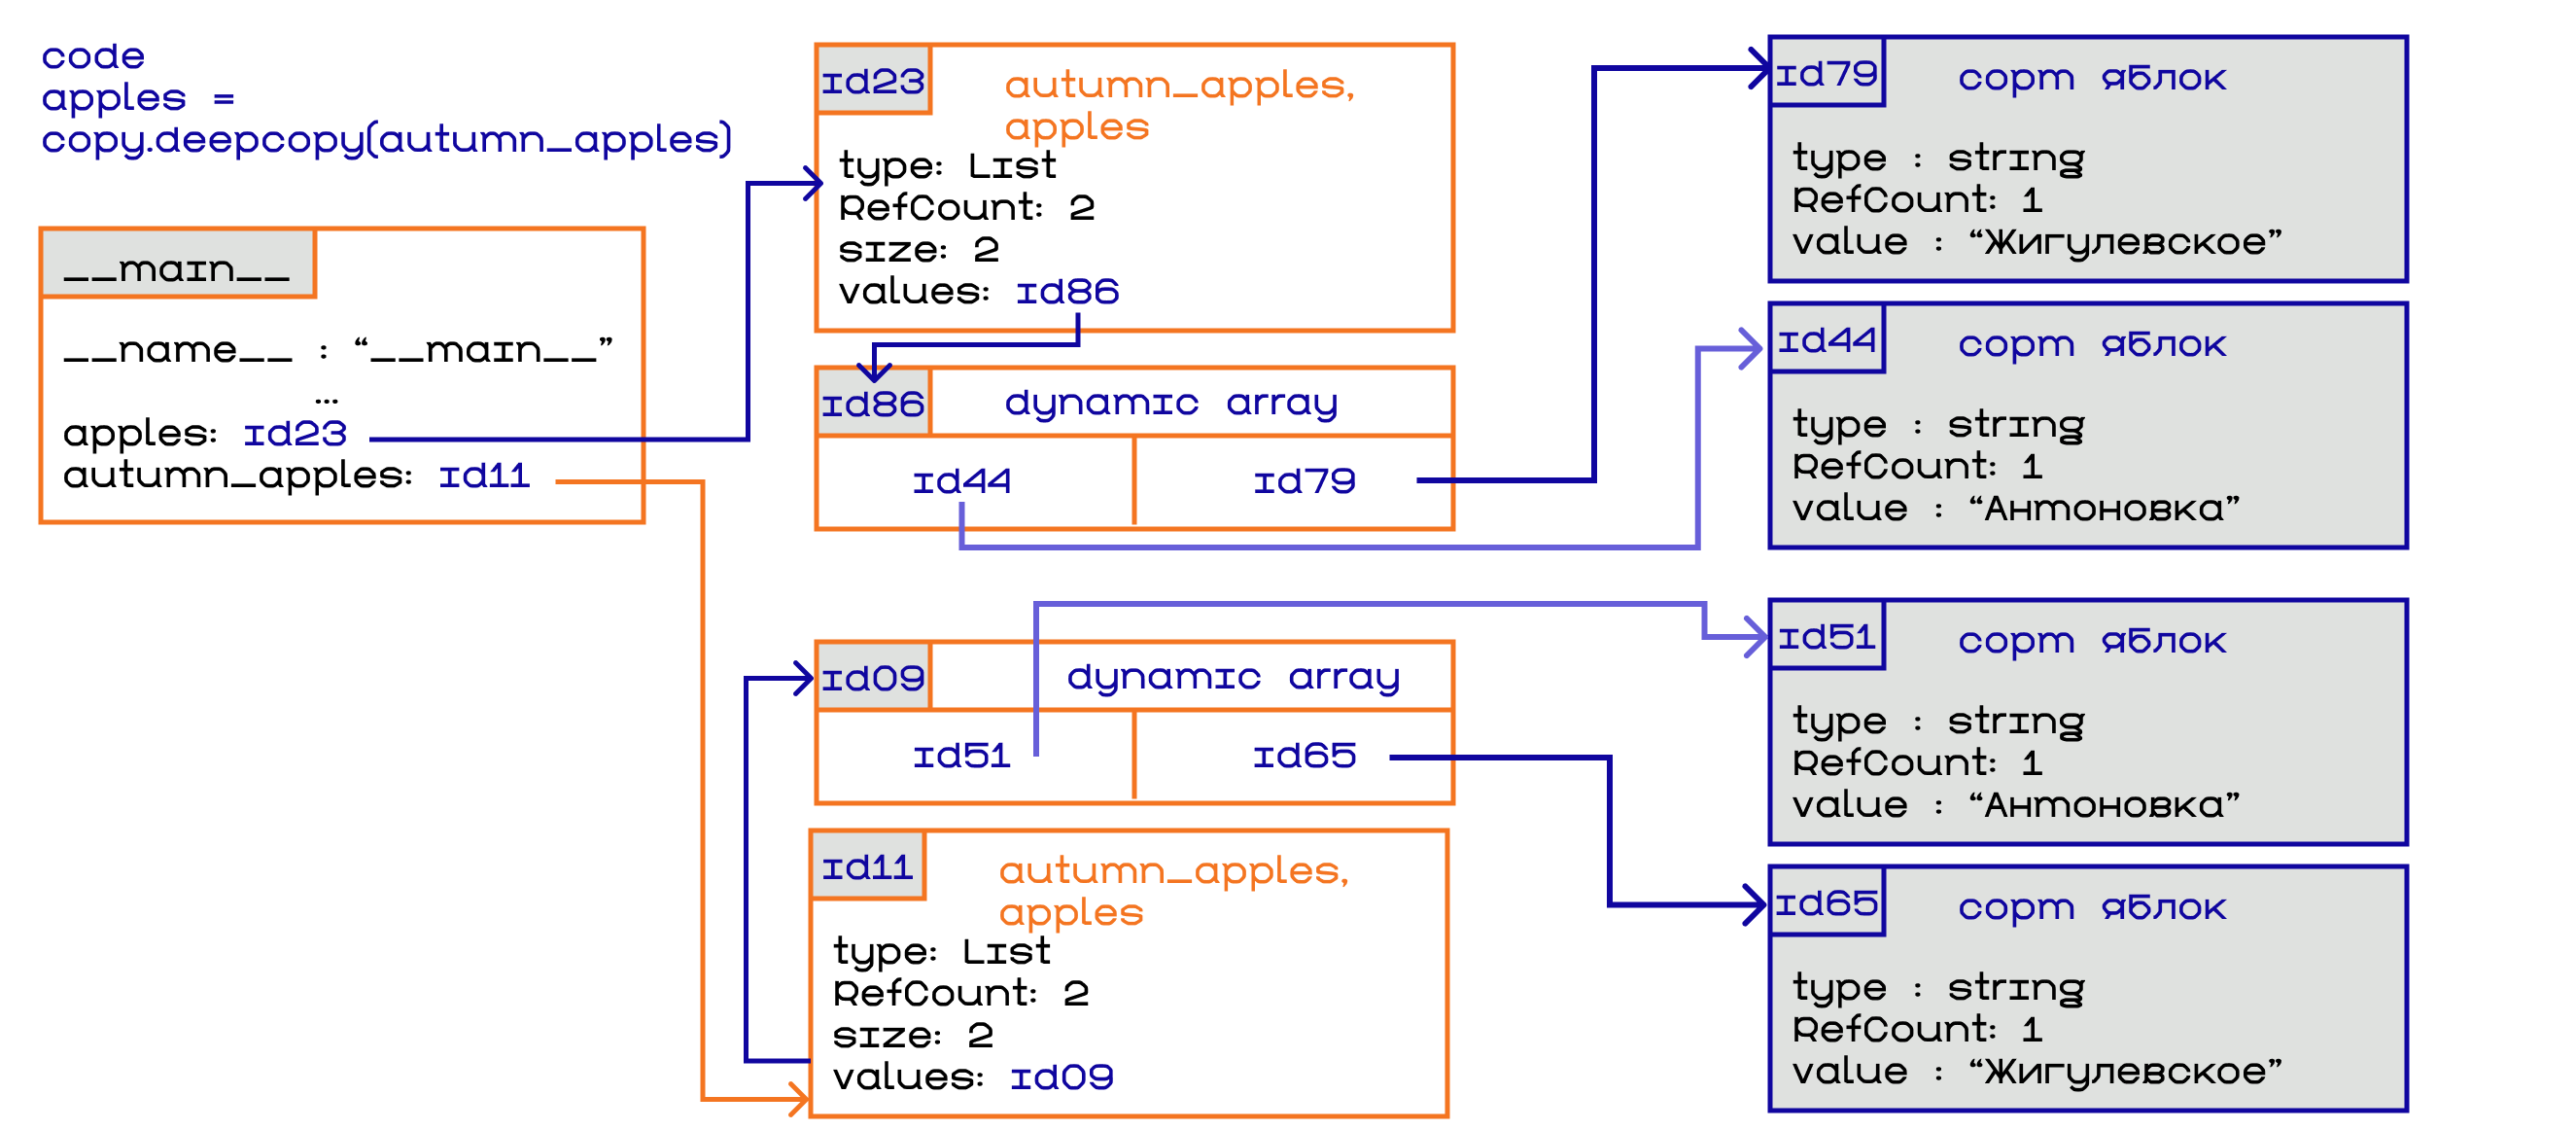

## Удаление объекта (метод del)

Аналогично С++, раз есть конструкторы (или их аналоги), (возможно) должны быть и деструкторы. Можно было бы предположить, что это метод `__del__`. Но есть [нюанс...](https://docs.python.org/3/reference/datamodel.html#object.__del__)

In [ ]:
class DeleteOptions:
    def __delitem__(self, key):
        print(f"__delitem__ method of {self.__class__.__name__}")

    def __delattr__(self, item):
        print(f"__delattr__ method of {self.__class__.__name__}")

    def __del__(self):
        print(f"__del__ method of {self.__class__.__name__}")

x = DeleteOptions()
del x[0]
del x.attribute_name
del x

__delitem__ method of DeleteOptions
__delattr__ method of DeleteOptions
__del__ method of DeleteOptions


`del x[0]` вызвал метод `__delitem__`

`del x.attribute_name` вызвал метод `__delattr__`

Но вызвал ли `del x` метод `__del__`?

На самом деле ответ нет.

`del x` лишь уменьшил количество ссылок на x на 1. Продемонстрируем это на примере:

In [ ]:
def foo(a):
    print("В функции: RefCount = 2")
    del a
    print("В функции: RefCount = 1")

print("RefCount = 0")
x = DeleteOptions()
print("RefCount = 1")
foo(x)
print("RefCount = 1")
del x
print("RefCount = 0")

RefCount = 0
RefCount = 1
В функции: RefCount = 2
В функции: RefCount = 1
RefCount = 1
__del__ method of DeleteOptions
RefCount = 0


Последний `del` вcё же вызвал `__del__`. Но означает ли это, что если я реализую класс для соединения с базами данных, то я могу использовать del для закрытия соединения?

Ответ НЕТ, НЕЛЬЗЯ.

Документация гласит:

> It is not guaranteed that __del__() methods are called for objects that still exist when the interpreter exits. weakref.finalize provides a straightforward way to register a cleanup function to be called when an object is garbage collected.

При этом с другой стороны, в случае если у меня есть циклические ссылки, RefCount может не сразу достичь нуля или вообще не достичь до момента закрытия интерпретатора. Глобально документация не гарантирует, что удаление объекта вообще должно начаться, когда RefCount становится 0, но тут нам повезло с CPython, реализация которого гарантирует нам это.

### del и ошибки

Так как время вызова `__del__` не фиксировано, обработка ошибок в нём совершенно не тривиальная задача.

> Due to the precarious circumstances under which __del__() methods are invoked, exceptions that occur during their execution are ignored, and a warning is printed to sys.stderr instead.


Как это будет выглядеть?

In [ ]:
class DelWithAnError:
    def __del__(self):
        raise ValueError("Oh no I have created an error in del!!!")


a = DelWithAnError()
print("Hi there!")
del a
print("Hello? Is anyone there?")

Exception ignored in: <function DelWithAnError.__del__ at 0x00000272E75B19E0>
Traceback (most recent call last):
  File "C:\Users\Nicky\AppData\Local\Temp\ipykernel_36464\1680991997.py", line 3, in __del__
ValueError: Oh no I have created an error in del!!!


Hi there!
Hello? Is anyone there?


### del и воскрешение

> Heroes never die...

Согласно документации:

> It is possible (though not recommended!) for the __del__() method to postpone destruction of the instance by creating a new reference to it. This is called object resurrection. It is implementation-dependent whether __del__() is called a second time when a resurrected object is about to be destroyed; the current CPython implementation only calls it once.

Как это выглядит:

In [ ]:
x = None


class Zombie:
    def __init__(self, name):
        self.name = name

    def __del__(self):
        print(f"Zombie {self.name} has TOTALLY (100%) died trust me bro")
        global x
        x = self

z = Zombie("Carl")
del z
print(f"OH NO!!!! Zombie {x.name} is still alive!!!")

Zombie Carl has TOTALLY (100%) died trust me bro
OH NO!!!! Zombie Carl is still alive!!!


Решение всех проблем с del (обычно) контекстные менеджеры, о них поговорим на семинарах :)

## Динамическое изменение атрибутов у класса: getattr(), setattr(), hasattr(), delattr()

Мы умеем работать с атрибутами объектов класса (и атрибутами класса) динамически. Например:

In [ ]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

p = Person("Ivan", 19)
print(p.name)
print(p.age)

p.last_name = "Ivanov"
print(p.last_name)

del p.last_name
print(p.last_name)

Ivan
19
Ivanov


AttributeError: 'Person' object has no attribute 'last_name'

In [ ]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

p = Person("Ivan", 19)
print(p.name)
print(p.age)

# эквивалентно

print(getattr(p, "name", "нет этого атрибута"))
print(getattr(p, "age", "нет этого атрибута"))
print(getattr(p, "last_name", "нет этого атрибута"))

Ivan
19
Ivan
19
нет этого атрибута


Благодаря такому обращению нам не нужно хардкодить название атрибута - `p.name`, теперь мы можем хранить название атрибута в переменной

In [ ]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

p = Person("Ivan", 19)


for att in ["name", "last_name", "job", "age", "height"]:
    print(hasattr(p, att))

True
False
False
True
False


## __getattr__ vs __getattribute__, __setattr__, __delattr__

In [ ]:
#__getattr__ вызывается только когда НЕ был найден такой атрибут НИ у объекта, ни у класса, ни у родителей
class Person:
    def __init__(self, name):
        self.name = name

    def __getattr__(self, att):
        return f"attribute {att} has been called, but it doesn't exist"

p = Person("Ivan")
print(p.name)
print(p.age)

Ivan
attribute age has been called, but it doesn't exist


In [ ]:
# __getattribute__ вызывается ВСЕГДА, когда идёт обращение по атрибуту

# Посмотрим на пример реализации

class Person:
    def __init__(self, name):
        self.name = name

    def __getattribute__(self, name):
        print(f"Hi! It's me, __getattribute__ looking for {name}")
        return getattr(self, name)


p = Person("Ivan")
print(p.age)
print(p.name)
print(getattr(p, "name"))

Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ looking for age
Hi! It's me, __getattribute__ look

RecursionError: maximum recursion depth exceeded in comparison

Упс! Что делать?

Видимо, писать if...

In [ ]:
# Аналогично с __setattr__ и __delattr__ - они вызываются, когда атрибут объекта класса должен измениться или удалиться

class Person:
    def __init__(self, name):
        self.name = name

    def __setattr__(self, name, value):
        print(f"Hi! It's me, __setattr__ looking for {name} = {value}")
        return setattr(self, name, value)


p = Person("Ivan")
p.age = 19

Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setattr__ looking for name = Ivan
Hi! It's me, __setat

RecursionError: maximum recursion depth exceeded while calling a Python object

## Другие Dunder методы

## Приведение типов

Для преобразования объекта в базовые типы данных имеются соответсвующие magic-методы: `str`, `int`, `float`, `bool`.

### `__str__`

Создадим простой класс: вектор с двумя координатами и цветом.

In [ ]:
import random

class Vector:
    def __init__(self, x=0, y=0, color=None):
        if type(x) is not int or type(y) is not int:
            raise AttributeError('x and y should be int')

        self._x = x
        self._y = y
        self._color = color

    def get_x(self):
        return self._x

    def get_y(self):
        return self._y

Создадим экземпляр вектора и посмотрим на его строчное представление:

In [ ]:
vector = Vector(1, 2, 'red')
print(vector) # функция print вызывает метод __str__ от всех нестроковых переданных аргументов

Информативно, но не очень красиво. Можем переопределить поведение метода приведения нашего класса к строковому типу - `__str__`:

In [ ]:
class VectorWithStr(Vector):
    def __str__(self):
        return f"vector ({self._x}, {self._y}) of color {self._color}"

In [ ]:
vector = VectorWithStr(1, 2, 'red')
str(vector)

'vector (1, 2) of color red'

Просто преобразование в строку? Конечно, нет. Неявные преобразования иногда происходят там, где мы их не ожидаем, например, при вызове `print`:

In [ ]:
print(vector)

vector (1, 2) of color red


### `__repr__`

Посмотрим как объект будет выглядеть в качестве ключа для словаря:

In [ ]:
mydict = {vector: "vector"}
mydict.keys()

dict_keys([<__main__.VectorWithStr object at 0x79e73ffdd8d0>])

Аналогично и при выводе списка, содержащего наш объект:

In [ ]:
mylist = [vector]
print(mylist)

Почему опять "некрасивые" строки?! В Python используется два способа приведения к строке. Это функции `str` и `repr`, которые отличаются своим назначением.

- `str` используется там, где нужна человекочитаемость
- `repr` реализуется так, чтобы можно было однозначно определить, о каком объекте идет речь, вызывается явно

Если `repr` не реализован, используется стандартный вариант, а если не реализован `str`, то вместо него используется `repr`.

Добавим `repr`:

In [ ]:
class VectorWithRepr(Vector):
    def __repr__(self):
        return f"vector (x: {self._x}, y: {self._y}, color: {self._color})"

In [ ]:
vector = VectorWithRepr(1, 2, 'red')
vector

vector (x: 1, y: 2, color: red)

In [ ]:
mylist = [vector]
mylist

[vector (x: 1, y: 2, color: red)]

In [ ]:
mydict = {vector: "vector"}
mydict.keys()

dict_keys([vector (x: 1, y: 2, color: red)])

### Числовые типы

In [ ]:
import math

class VectorWithTypes(VectorWithRepr, VectorWithStr):
    def __bool__(self):  # неявно вызывается при использовании объекта в условиях
        return bool(self._x) or bool(self._y)  # True если вектор ненулевой

    def __float__(self):
        return float(self._x ** 2 + self._y ** 2)

    def __int__(self):
        return int(float(self))

Проверим работу приведения к типам:

In [ ]:
vector = VectorWithTypes(3, 4, 'blue')
int(vector)

25

In [ ]:
float(vector)

25.0

In [ ]:
"vector ~ True" if vector else "vector ~ False"

'vector ~ True'

## Арифметические методы

В Python имеются magic-методы для поддержки арифметических операций с пользовательскими классами:

In [ ]:
import math
import random

class VectorWithMath(VectorWithTypes):
    def __abs__(self):
        return math.hypot(self._x, self._y) # возвращает евклидову норму

    def __add__(self, other):
        return VectorWithMath(
            self.get_x() + other.get_x(),
            self.get_y() + other.get_y(),
            random.choice((str(self._color), str(other._color)))
        )

    def __sub__(self, other):
        return VectorWithMath(
            self.get_x() - other.get_x(),
            self.get_y() - other.get_y(),
            random.choice((str(self._color), str(other._color)))
        )

# Другие магические арифметические методы:

# __mul__(self, other) — умножение (*)
# __truediv__(self, other) — деление (/)
# __floordiv__(self, other) — целочисленное деление (//)
# __mod__(self, other) — остаток от деления (%)
# __pow__(self, other[, modulo]) — возведение в степень (**)
# __divmod__(self, other) — комбинация целочисленного деления и остатка от деления (divmod())
# __iadd__(self, other) — сложение с присваиванием (+=)
# __isub__(self, other) — вычитание с присваиванием (-=)
# __imul__(self, other) — умножение с присваиванием (*=)
# __itruediv__(self, other) — деление с присваиванием (/=)
# __ifloordiv__(self, other) — целочисленное деление с присваиванием (//=)
# __imod__(self, other) — остаток от деления с присваиванием (%=)
# __ipow__(self, other) — возведение в степень с присваиванием (**=)
# __radd__(self, other) — обратное сложение
# __rsub__(self, other) — обратное вычитание
# __rmul__(self, other) — обратное умножение
# __rtruediv__(self, other) — обратное деление
# __rfloordiv__(self, other) — обратное целочисленное деление
# __rmod__(self, other) — обратный остаток от деления
# __rpow__(self, other) — обратное возведение в степень

Создадим три объекта и попробуем производить операции с ними:

In [ ]:
vector1 = VectorWithMath(3, 4, 'blue')
vector2 = VectorWithMath(1, 2, 'red')
vector3 = VectorWithMath(1, 0, 'green')

In [ ]:
abs(vector1)

5.0

In [ ]:
vector1 + vector2

vector (x: 4, y: 6, color: red)

In [ ]:
vector1 - vector2

vector (x: 2, y: 2, color: red)

In [ ]:
vector1 += vector2
vector1

vector (x: 4, y: 6, color: blue)

## Несколько полезных декораторов (фишек)

Иногда не хочется определять все мэджик методы, т.к. это избыточно. Есть некоторые декораторы, которые могут помочь сэкономить время:

### 1. Dataclass

Пусть нам нужно хранить информацию о каких-то похожих объектах (например, о томатах для игры весёлая ферма). Какие есть опции, как её хранить?

#### Вариант 0 - в качестве tuple

Это хорошо со стороны памяти, но абсолютно нечитаемо :(

In [14]:
garden = [(0, 10, 20), (1, 10, 20), (2, 20, 10)]

for t in garden:
    print(f"{t[0]} tomato is {t[1]} days old. It will be ready for harvesting in {t[2]} days")


0 tomato is 10 days old. It will be ready for harvesting in 20 days
1 tomato is 10 days old. It will be ready for harvesting in 20 days
2 tomato is 20 days old. It will be ready for harvesting in 10 days


#### Вариант 1 - класс

Но определение класса и дефолтных методов немного длинное

In [15]:
class Tomato:
    def __init__(self, num, days_old, days_till_harvest):
        self.num = num
        self.days_old = days_old
        self.days_till_harvest = days_till_harvest


garden = [Tomato(0, 10, 20), Tomato(0, 10, 20), Tomato(1, 20, 10)]

for t in garden:
    print(t) # некрасиво, надо реализовать __str__/__repr__

print(garden[0] == garden[1]) # неправда, надо реализовать __eq__

False


#### Вариант 2 - датакласс

In [16]:
from dataclasses import dataclass

@dataclass()
class Tomato:
    num: int
    days_old: int
    days_till_harvest: int

garden = [Tomato(0, 10, 20), Tomato(0, 10, 20), Tomato(1, 20, 10)]

for i in range(len(garden)):
    print(garden[i].__repr__())

print(garden[0] == garden[1])


Tomato(num=0, days_old=10, days_till_harvest=20)
Tomato(num=0, days_old=10, days_till_harvest=20)
Tomato(num=1, days_old=20, days_till_harvest=10)
True


### Total_ordering

Вторая проблема - чтобы пользоваться методом != надо его определить, даже если определён =. Для того, чтобы автоматически строились все эти методы по двум необходимым, есть такие декораторы.

In [17]:
from functools import total_ordering

@total_ordering
class Student:
    def __init__(self, name, gpa):
        self.name = name
        self.gpa = gpa

    def __eq__(self, other) -> bool:
        if not isinstance(other, Student):
            return NotImplemented
        return self.gpa == other.gpa

    def __lt__(self, other) -> bool:
        if not isinstance(other, Student):
            return NotImplemented
        return self.gpa < other.gpa

    def __repr__(self) -> str:
        return f"Student(name='{self.name}', gpa={self.gpa})"

alice = Student("Alice", 3.8)
bob = Student("Bob", 3.5)
charlie = Student("Charlie", 3.8)
diana = Student("Diana", 4.0)

print(f"{alice} == {charlie}: {alice == charlie}")  # True (same GPA)
print(f"{alice} != {bob}: {alice != bob}")          # True
print(f"{bob} < {alice}: {bob < alice}")            # True
print(f"{alice} <= {charlie}: {alice <= charlie}")  # True
print(f"{diana} > {alice}: {diana > alice}")        # True
print(f"{diana} >= {charlie}: {diana >= charlie}")  # True

Student(name='Alice', gpa=3.8) == Student(name='Charlie', gpa=3.8): True
Student(name='Alice', gpa=3.8) != Student(name='Bob', gpa=3.5): True
Student(name='Bob', gpa=3.5) < Student(name='Alice', gpa=3.8): True
Student(name='Alice', gpa=3.8) <= Student(name='Charlie', gpa=3.8): True
Student(name='Diana', gpa=4.0) > Student(name='Alice', gpa=3.8): True
Student(name='Diana', gpa=4.0) >= Student(name='Charlie', gpa=3.8): True


## Про ООП и абстракции (ещё раз)

Итак, мы с вами посмотрели на Magic методы.

В рамках семинаров рассмотрены наследование, полиморфизм инкапсуляция.

In [5]:
# Наследование: не надо копировать код функции say_hi
# Полиморфизм: у собаки и кошки разные make_sound

class Animal:
    def say_hi(self):
        print(f"Привет! Меня зовут {self.name}")

    def make_sound():
        pass

class Dog(Animal):
    def __init__(self, name):
        self.name = name

    def make_sound(self):
        print("Гав!")

class Cat(Animal):
    def __init__(self, name):
        self.name = name

    def make_sound(self):
        print("Мяу!")


d = Dog("Шарик")
d.make_sound()
d.say_hi()

c = Cat("Матроскин")
c.make_sound()
c.say_hi()

Гав!
Привет! Меня зовут Шарик
Мяу!
Привет! Меня зовут Матроскин


Но как реализовать абстракции в питоне?

Видим, что в питоне наследование не требует переопределения методов родителя - а я бы хотел научиться требовать наличие определённых методов, давать контракт, что у этого класса должен быть такой-то метод.

### Вариант 1. ABC

In [7]:
from abc import ABC, abstractmethod

In [9]:
class Animal(ABC):
    @abstractmethod # это такая магия, на самом деле, это декоратор. Если так написать перед функцией, то её работа изменится
    def make_sound(self):
        pass

class Dog(Animal):
    def make_sound(self):
        print("Гав!")

d = Dog()
d.make_sound()

Гав!


In [10]:
class Cat(Animal):
    def meow(self): # важно! не make_sound
        print("Мяу!")

# пока что ок

In [11]:
c = Cat()

TypeError: Can't instantiate abstract class Cat without an implementation for abstract method 'make_sound'

### Вариант 2. Протоколы и Duck Typing

**Тест на утку**

> Если это выглядит как утка, плавает как утка и крякает как утка, то это, вероятно, и есть утка.

In [12]:
from typing import Protocol

class Eatable(Protocol):
    def eat(self): # Необязательно реализовывать протокол
        pass

class Apple:
    def __init__(self, color: str):
        self.color = color

    def eat(self):
        return self.color + " apple"


# Внизу пример Duck Typing - нам не важно, кто именно будет передан в food
# Важно, чтобы у него был метод  eat - это в Protocol
def do_eat(name: str, food: Eatable) -> None:
    print(f"{name} has eaten a " + food.eat())


# Сработает, т.к. у Apple есть метод eat - он Eatable
a = Apple("red")
do_eat("Nick", a)


Nick has eaten a red apple


In [13]:
class Onion:
    def dice(self):
        print("I am crying!")

# Не сработает, т.к. у Onion нет метода eat - он НЕ Eatable
o = Onion()
do_eat("Nick", o)

AttributeError: 'Onion' object has no attribute 'eat'